## 1. Import the necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

## 2. Load the dataset 
####  Display the first 5 rows.

In [31]:
data = pd.read_csv(r"C:\Users\623300\Downloads\shopping_trends.csv")

# Display the first 5 rows of the dataset
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

## 3. Data Cleaning
#### Check data for missing values and duplicates.

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [33]:
print(data.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [34]:
#check for duplicate rows
duplicate_count = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


## 4. Exploratory Data Analysis and Visualization

In [35]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


<Figure size 1000x500 with 0 Axes>

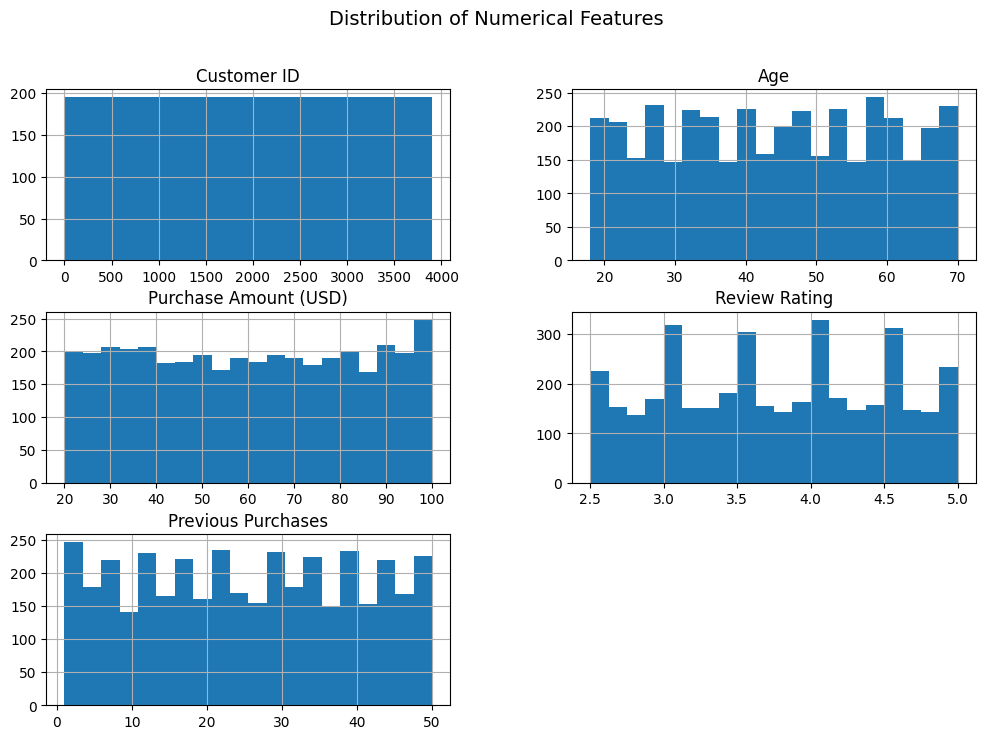

In [36]:
#We plot histograms to see how numerical columns are distributed.
# Plot distributions of numerical columns
plt.figure(figsize=(10, 5))
data.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

####  This helps us understand trends in numerical data, such as whether purchase amounts are normally distributed.

C:\Users\623300\AppData\Local\Temp\ipykernel_13368\2080758331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Gender", palette="pastel")


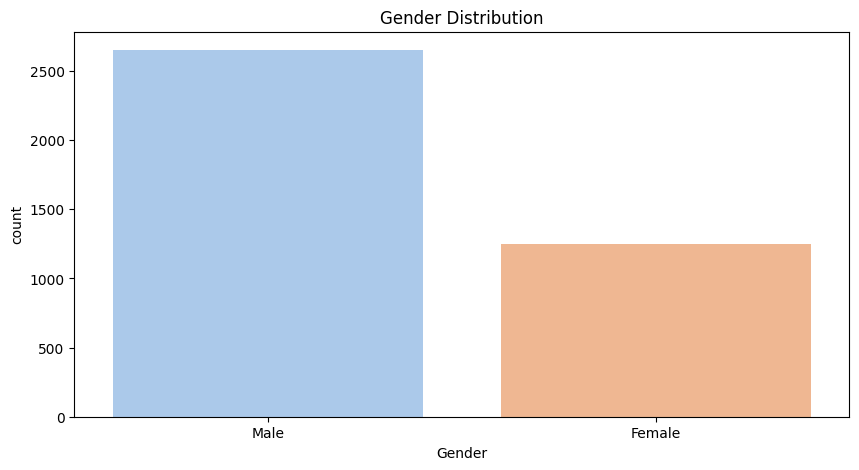

In [37]:
# Count plot for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Gender", palette="pastel")
plt.title("Gender Distribution")
plt.show()

##### This tells us how many males vs. females are in the dataset.

#### Which product category is most purchased?

C:\Users\623300\AppData\Local\Temp\ipykernel_13368\626539295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Category", palette="coolwarm", order=data["Category"].value_counts().index)


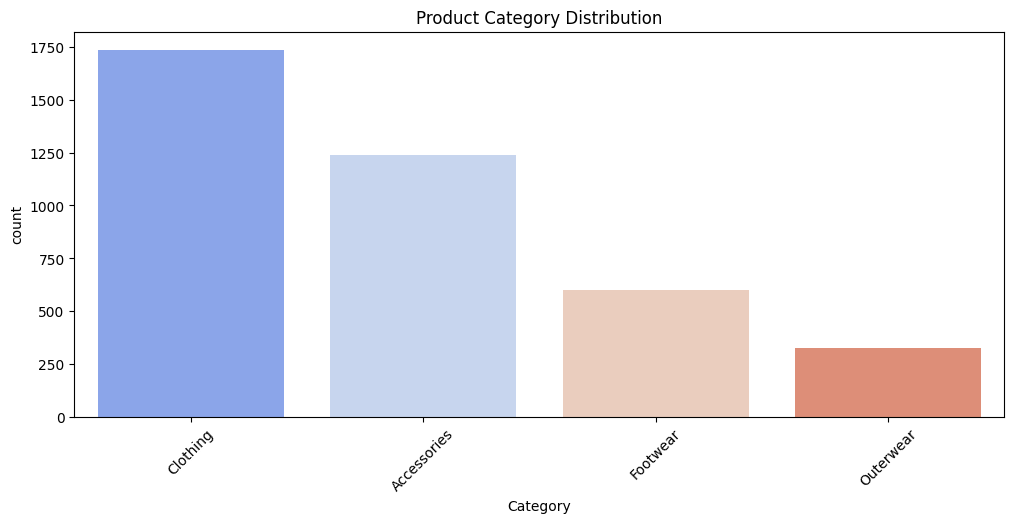

In [38]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Category", palette="coolwarm", order=data["Category"].value_counts().index)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

#### Check how purchase amount varies with gender

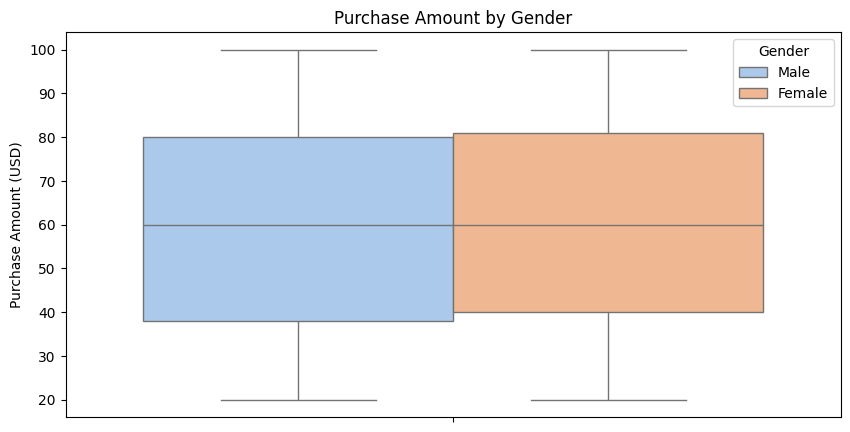

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, hue="Gender", y="Purchase Amount (USD)", palette="pastel")
plt.title("Purchase Amount by Gender")
plt.show()

#### Check how purchase amount varies with age

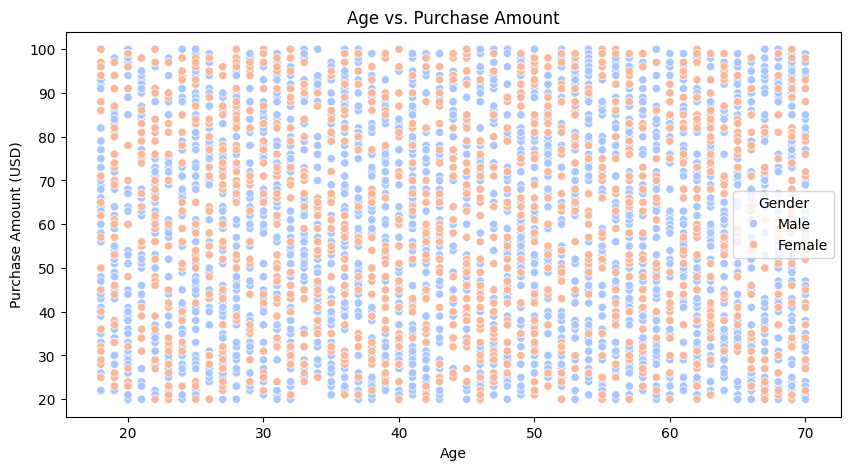

In [40]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="Age", y="Purchase Amount (USD)", hue="Gender", palette="coolwarm")
plt.title("Age vs. Purchase Amount")
plt.show()

## Data Visualization

#### How are customers distibuted by age

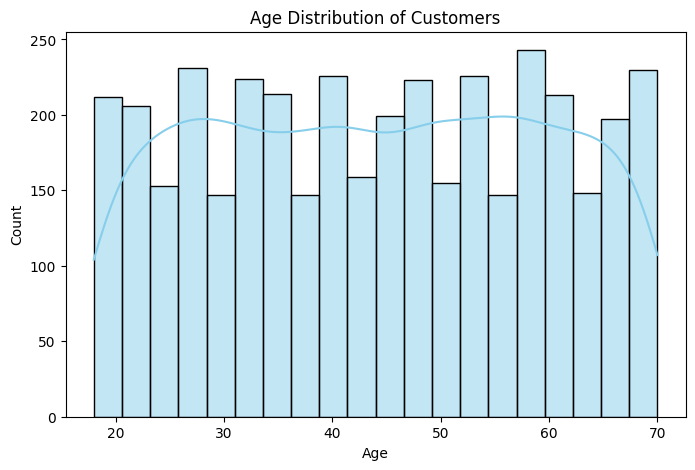

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

#### Countchart of most popular payments

C:\Users\623300\AppData\Local\Temp\ipykernel_13368\1175969237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Payment Method", order=data["Payment Method"].value_counts().index, palette="coolwarm")


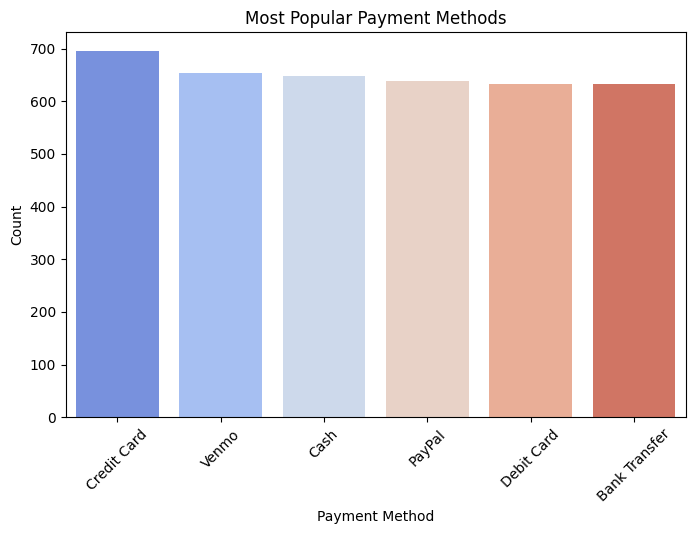

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="Payment Method", order=data["Payment Method"].value_counts().index, palette="coolwarm")
plt.title("Most Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Let's look at which location has the highest demand in each season.

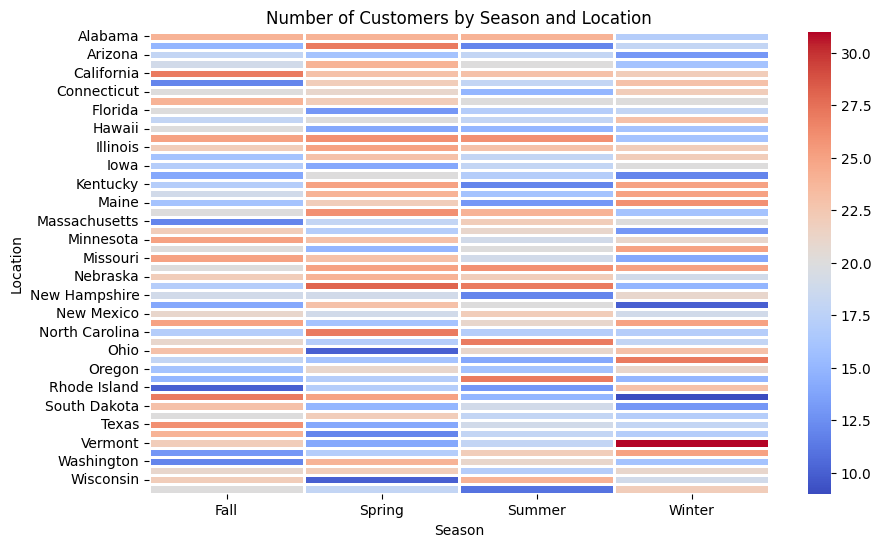

In [43]:
# Count number of customers per Season and Location
customer_counts = data.groupby(["Season", "Location"]).size().reset_index(name="Customer Count")

# Pivot for heatmap format
pivot_table = customer_counts.pivot(index="Location", columns="Season", values="Customer Count")

# Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt="g", linewidths=1)
plt.title("Number of Customers by Season and Location")
plt.xlabel("Season")
plt.ylabel("Location")
plt.show()